# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

The goal of this project is to find if a flight will be delayed because of weather, departure time, or airline work.  
There is a lot of flight data from many years and airports, so it is hard for people to find delay patterns by hand.  
Machine learning can help find links between different types of data, like numbers and categories.


### 2. Formulate the business problem, success metrics, and desired ML output.

Business Problem:
The company wants to make the flight booking experience better by giving customers early notices about possible flight delays, especially those caused by weather, at the busiest U.S. airports.

Business Goal:
Build a model that can predict if a flight will be delayed because of weather when the customer books it. This helps improve customer satisfaction and helps people make better travel choices.

Success Metrics:
- Accuracy - shows how many predictions are correct overall. High accuracy means the model seems to perform well, but if most flights aren’t delayed, the model could just predict “no delay” for almost all cases and still look good. So, we can’t rely only on accuracy to judge the model.

- Recall (Sensitivity) - more important, because missing a real delay (false negative) is worse than giving a false alert (false positive).

Most flights are not delayed, so Recall helps the model find real delay cases in this unbalanced dataset.

Desired ML Output
A label showing if a flight will be: Delayed and Not Delayed



### 3. Identify the type of ML problem you’re dealing with.

This task represents a supervised learning problem — specifically a binary classification task.
The model will learn from historical flight data labeled with delay outcomes to classify future flights as either delayed or on-time.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [211]:
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [212]:
# Initialize relative paths for folders
base_path = os.getcwd()
zip_path = os.path.join(base_path, 'data_compressed')
csv_base_path = os.path.join(base_path, 'data')

# Create the folder if it doesn't exist
os.makedirs(csv_base_path, exist_ok=True)

In [213]:
# Number of Zip files
num_files = len(os.listdir(zip_path))
print(f"Total files found:",num_files)

Total files found: 60


In [214]:
def get_zip_file_paths(zip_directory):
    """Return full paths of all .zip files in the specified directory."""
    return [
        os.path.join(zip_directory, f)
        for f in os.listdir(zip_directory)
        if f.lower().endswith('.zip')
    ]

# Use the function
zip_files = get_zip_file_paths(zip_path)


#### Extract CSV files from ZIP files

In [215]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting D:\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting D:\data\data_compressed\On_Time_

In [217]:
csv_files = []
for file in os.listdir(csv_base_path):
    if file.endswith(".csv"):
        csv_files.append(file)

print("Total csv files found:", len(csv_files))


Total csv files found: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [218]:
from IPython.core.display import HTML

with open(f"{csv_base_path}/readme.html", 'r') as f:
    html_file = f.read()

display(HTML(html_file))

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [219]:
df_temp = pd.read_csv( os.path.join(csv_base_path, 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_12.csv' ))


**Question**: Print the row and column length in the dataset, and print the column names.

In [220]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')
print(f'Columns in one csv file are',list(df_temp.columns))

Rows and columns in one csv file is (464205, 110)
Columns in one csv file are ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NA

**Question**: Print the first 10 rows of the dataset.  

In [221]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2017,4,12,1,5,2017-12-01,VX,21171,VX,N854VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,4,12,1,5,2017-12-01,VX,21171,VX,N854VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,4,12,1,5,2017-12-01,VX,21171,VX,N842VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,4,12,1,5,2017-12-01,VX,21171,VX,N845VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,4,12,1,5,2017-12-01,VX,21171,VX,N851VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017,4,12,1,5,2017-12-01,VX,21171,VX,N836VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,4,12,1,5,2017-12-01,VX,21171,VX,N842VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,4,12,1,5,2017-12-01,VX,21171,VX,N630VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017,4,12,1,5,2017-12-01,VX,21171,VX,N841VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017,4,12,1,5,2017-12-01,VX,21171,VX,N285VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [222]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [223]:
# Find and print columns containing 'Del'
columns_with_del = [c for c in df_temp.columns if 'Del' in c]

print("Columns containing the word 'Del'-")
print("#########")
print("\n".join(columns_with_del))
print(f"\nNumber of columns containing the word 'Del' = {len(columns_with_del)}")

Columns containing the word 'Del'-
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay

Number of columns containing the word 'Del' = 14


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [224]:
# 1. Dataset shape
rows, cols = df_temp.shape
print(f"\n1. The dataset has {rows} rows and {cols} columns.")

# 2. Years and months covered
years = df_temp['Year'].unique()
months = df_temp['Month'].unique()
print(f"\n2. Years in the dataset: {years}")
print(f"   Number of years: {len(years)}")
print(f"   Months covered: {months}")
print(f"   Number of months: {len(months)}")

# 3. Date range
date_min, date_max = df_temp['FlightDate'].min(), df_temp['FlightDate'].max()
print(f"\n3. Date range: {date_min} to {date_max}")

# 4. Airlines included
airlines = df_temp['Reporting_Airline'].unique()
print(f"\n4. Airlines covered: {list(airlines)}")

# 5. Origin and destination airports
origins = df_temp['Origin'].unique()
dests = df_temp['Dest'].unique()
print(f"\n5. Origin airports: {list(origins)}")
print(f"   Destination airports: {list(dests)}")



1. The dataset has 464205 rows and 110 columns.

2. Years in the dataset: [2017]
   Number of years: 1
   Months covered: [12]
   Number of months: 1

3. Date range: 2017-12-01 to 2017-12-31

4. Airlines covered: ['VX', 'NK', 'AS', 'DL', 'HA', 'OO', 'AA', 'UA', 'WN', 'B6', 'F9', 'EV']

5. Origin airports: ['SFO', 'DCA', 'JFK', 'OGG', 'HNL', 'LAX', 'IAD', 'BNA', 'RDU', 'BWI', 'PHL', 'EWR', 'ORD', 'AUS', 'LAS', 'IND', 'MCO', 'FLL', 'BOS', 'MSY', 'SEA', 'PSP', 'DAL', 'PDX', 'DEN', 'SAN', 'KOA', 'MYR', 'CLE', 'DTW', 'PHX', 'RSW', 'MSP', 'BQN', 'ATL', 'ACY', 'PBI', 'BDL', 'DFW', 'LGA', 'TPA', 'LBE', 'MCI', 'OAK', 'IAH', 'SJU', 'STT', 'CAK', 'PIT', 'PBG', 'IAG', 'ADQ', 'ANC', 'BET', 'SCC', 'BRW', 'FAI', 'JNU', 'KTN', 'YAK', 'CDV', 'SIT', 'WRG', 'PSG', 'OME', 'OTZ', 'BUR', 'SMF', 'SNA', 'SJC', 'SLC', 'BLI', 'SBA', 'ONT', 'GEG', 'SAT', 'TUS', 'OMA', 'ABQ', 'STL', 'CHS', 'LIH', 'BOI', 'ADK', 'MIA', 'BHM', 'GSP', 'CVG', 'GSO', 'TLH', 'OKC', 'MSN', 'CLT', 'RNO', 'PHF', 'XNA', 'GRR', 'BUF', 'LEX'

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [225]:
# Create DF of Origin/Destination counts
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,168,167.0
ABI,1,NaN
ABQ,1600,1604.0
ABR,61,61.0
ACV,102,103.0
...,...,...
VPS,308,308.0
WRG,60,60.0
XNA,364,361.0
YAK,60,60.0


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [226]:
# Sort by Origin (desc) and show top 15
counts.sort_values(by='Origin',ascending=False).head(15 )

,Origin,Destination
ATL,28297,28293.0
ORD,20412,20365.0
DEN,18043,18067.0
LAX,17709,17715.0
SFO,14901,14911.0
DFW,14857,14849.0
PHX,12781,12789.0
LAS,12185,12182.0
MCO,11483,11496.0
SEA,11004,11009.0


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

**No. The ability to predict flight delay with ML depends on many features like past delay data and weather. Only having trip information does not help predict delay.**



Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [227]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Merge multiple CSV files into one DataFrame after filtering.
    
    Args:
        csv_files (list): CSV file names or paths.
        filter_cols (list): Columns to load from each CSV.
        subset_cols (list): Columns used for filtering.
        subset_vals (list of lists): Values to keep for each subset column.
        file_name (str): Output CSV file name.
    
    Returns:
        DataFrame: Combined and filtered data.
    """
    
    all_data = []
    
    for file in csv_files:
        # Read only selected columns
        df = pd.read_csv(os.path.join(csv_base_path, file), usecols=filter_cols)
        
        # Build combined filter condition dynamically
        condition = np.logical_and.reduce([
            df[col].isin(vals) for col, vals in zip(subset_cols, subset_vals)
        ])
        
        # Append filtered part
        all_data.append(df[condition])
    
    # Concatenate all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Save as CSV
    combined_df.to_csv(file_name, index=False)
    
    return combined_df


In [228]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [229]:
# Measure time to merge CSV files
import time
start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

# Combine all CSV files
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f"csv's merged in {round((time.time() - start)/60, 2)} minutes")


csv's merged in 3.94 minutes


#### Load dataset

Load the combined dataset.

In [29]:
# reading the combined csv
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [30]:
# Enter your code here 
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,AirTime,Distance,DistanceGroup
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,-20.0,0.0,0.0,0.0,0.0,99.0,689.0,3
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,-3.0,0.0,0.0,0.0,0.0,98.0,731.0,3
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,-7.0,0.0,0.0,0.0,0.0,174.0,1199.0,5
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,-4.0,0.0,0.0,0.0,0.0,233.0,1587.0,7
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,-13.0,0.0,0.0,0.0,0.0,179.0,1587.0,7


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [31]:
# 1. Dataset shape
rows, cols = data.shape
print(f"1. The dataset has {rows} rows and {cols} columns.")

# 2. Years and months in dataset
years = sorted([int(y) for y in data['Year'].unique()])
months = sorted([int(m) for m in data['Month'].unique()])

print(f"\n2. Years: {years}")
print(f"   Number of years: {len(years)}")
print(f"   Months: {months}")
print(f"   Number of months: {len(months)}")

# 3. Date range
date_min, date_max = data['FlightDate'].min(), data['FlightDate'].max()
print(f"\n3. Date range: {date_min} to {date_max}")

# 4. Airlines
airlines = data['Reporting_Airline'].unique()
print(f"\n4. Airlines: {list(airlines)}")

# 5. Origin and destination airports
origins = data['Origin'].unique()
dests = data['Dest'].unique()
print(f"\n5. Origin airports: {list(origins)}")
print(f"   Destination airports: {list(dests)}")


1. The dataset has 1658130 rows and 20 columns.

2. Years: [2014, 2015, 2016, 2017, 2018]
   Number of years: 5
   Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
   Number of months: 12

3. Date range: 2014-01-01 to 2018-12-31

4. Airlines: ['DL', 'OO', 'WN', 'UA', 'AA']

5. Origin airports: ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
   Destination airports: ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [32]:
# Rename column 'ArrDel15' to 'is_delay'
data.rename(columns={'ArrDel15' : 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [33]:
# Check null values in all columns
data.isnull().sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [34]:
# Rows before cleaning
print(f"Number of rows before cleaning = {len(data)}")

# Remove rows with missing values in key columns
data = data.dropna(subset=['ArrDelay', 'ArrDelayMinutes', 'AirTime'])

# Rows after cleaning
print(f"Number of rows after cleaning  = {len(data)}")

Number of rows before cleaning = 1658130
Number of rows after cleaning  = 1635590


In [35]:
# Check if any null values remain
null_counts = data.isnull().sum()
print(null_counts)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
Cancelled            0
Diverted             0
AirTime              0
Distance             0
DistanceGroup        0
dtype: int64


Get the hour of the day in 24-hour time format from CRSDepTime.

In [36]:
# Create new column for departure hour
data['DepHourofDay'] = data['CRSDepTime'] // 100

# Display sample of original and new columns
print(data[['CRSDepTime', 'DepHourofDay']].head())


   CRSDepTime  DepHourofDay
0        2145            21
1         945             9
2        1855            18
3        1634            16
4         700             7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

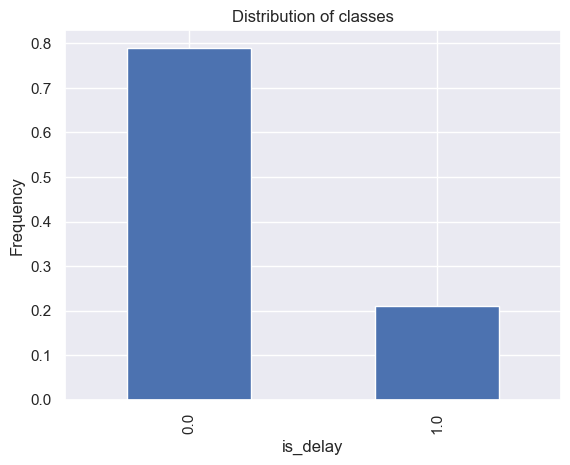

In [37]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

### **Flight Delay Distribution Insights**

- **Most flights (about 80%)** are on time or have **a delay under 15 minutes**.  
- **Some flights (about 20%)** are **delayed more than 15 minutes**.  
- This shows the dataset is **uneven**, with more on-time flights than delayed ones.  



**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

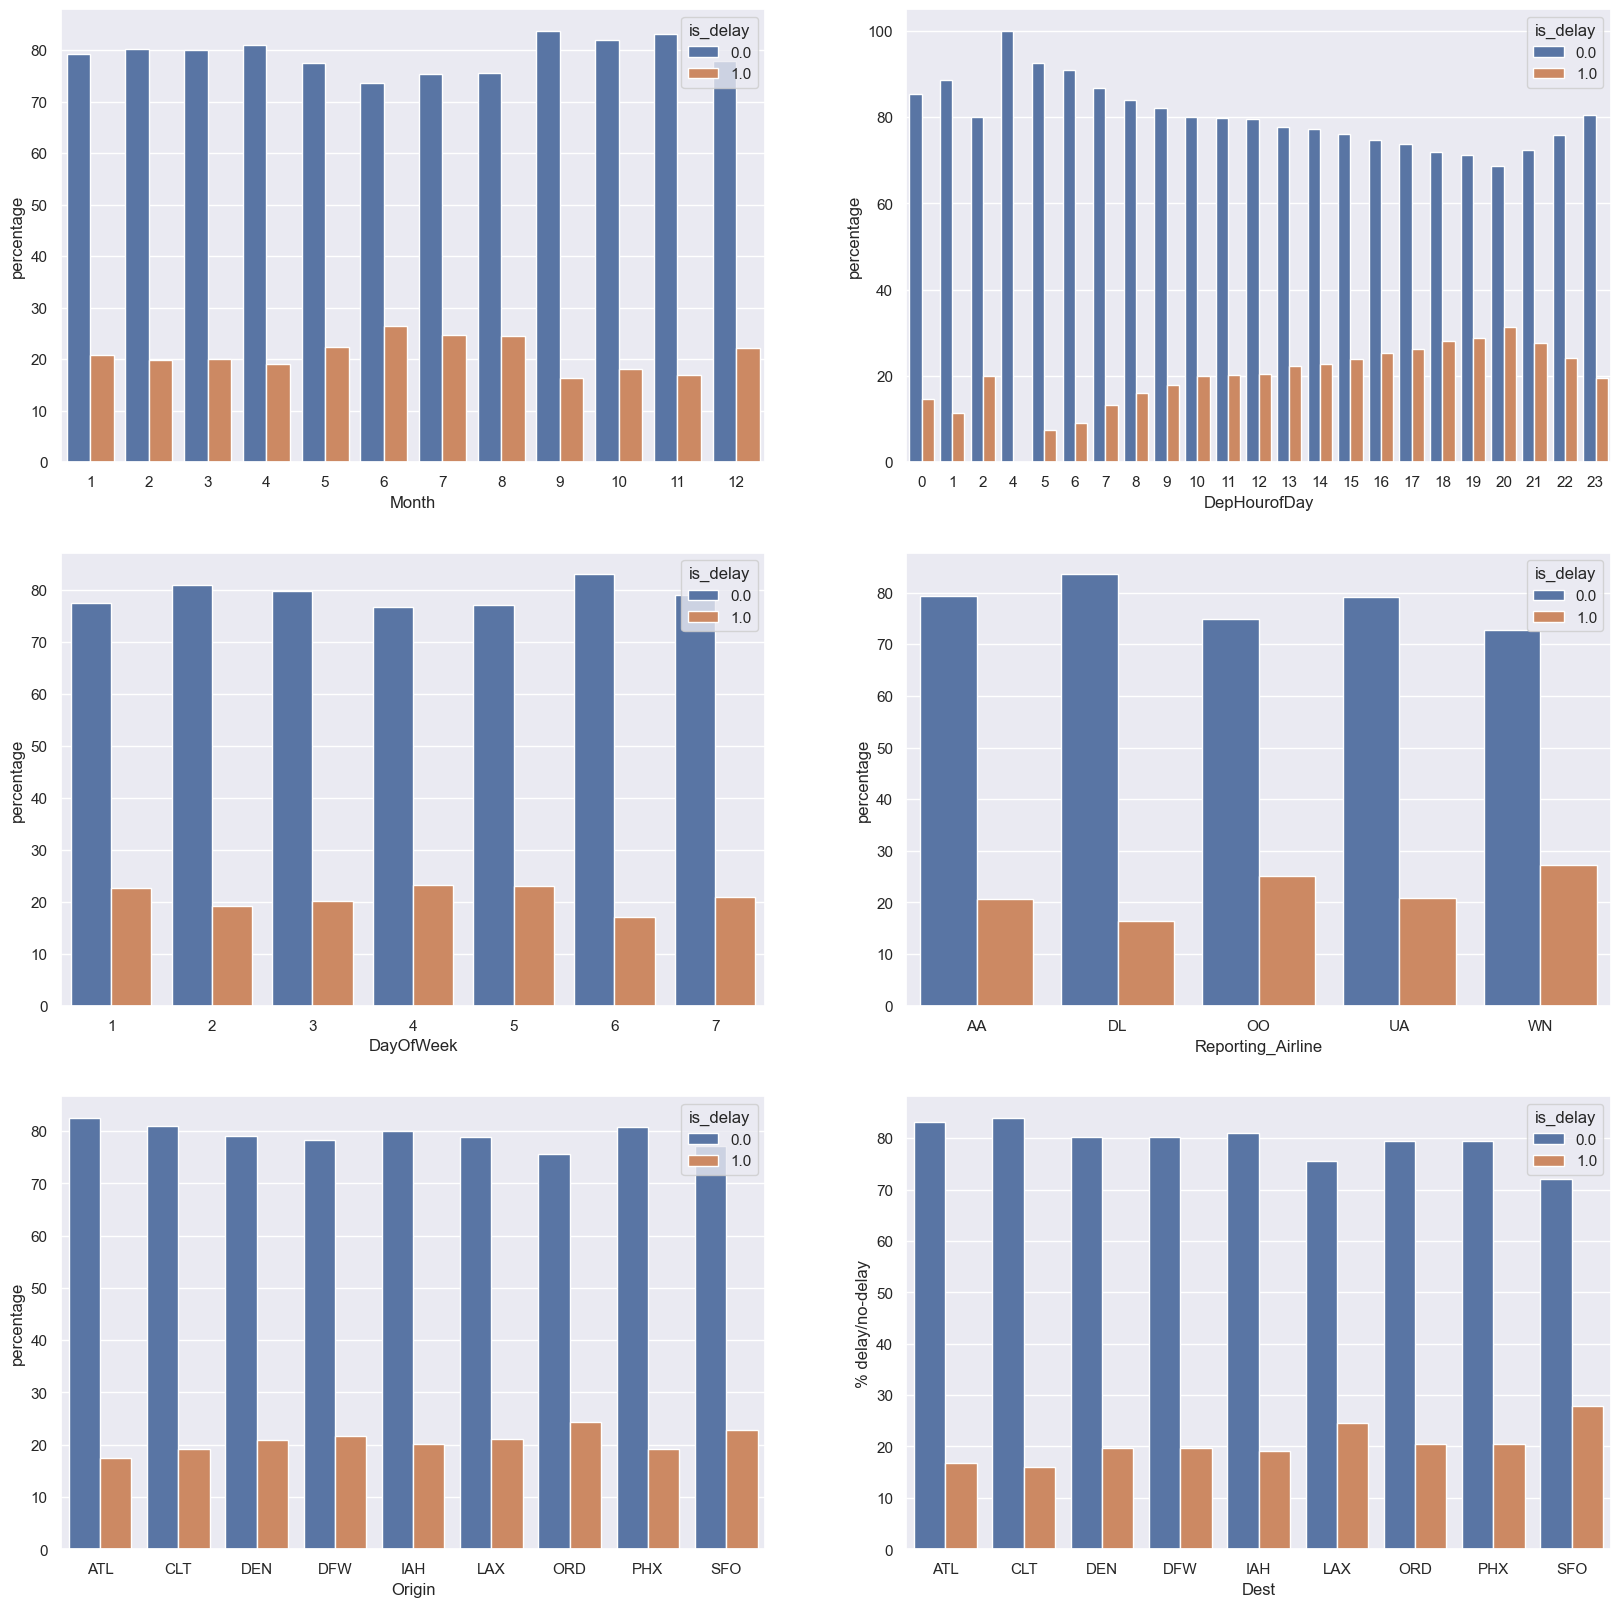

In [38]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

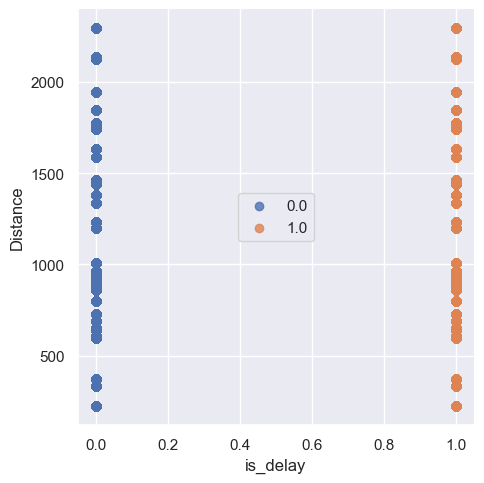

In [39]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

### Which months have the most delays?
- The first bar chart shows that **June**, followed by **July** and **August**, has the most delays.  
- These months have many more delayed flights (marked as 1.0) than other months, while **September** has the fewest.

### What time of the day has the most delays?
- The second chart shows that **late afternoon to evening (15:00–20:00)** has the most delays, with **20:00 (8 PM)** being the peak.  
- Flights **early in the morning**, around **4:00 AM**, have almost no delays.

### What day of the week has the most delays?
- The third chart shows that **Thursday (Day 4)** has the most delays.  
- **Tuesday (Day 2)** has the fewest.

### Which airline has the most delays?
- The fourth chart shows that **WN Airlines** has the most delays, followed by **OO Airlines**.  
- **DL Airlines** has the fewest.

### Which origin and destination airports have the most delays?
- **SFO** has the most delays among **destination airports**, and **ORD** has the most delays among **origin airports**.



### Features

Look at all the columns and what their specific types are.

In [40]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [41]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
Cancelled            float64
Diverted             float64
AirTime              float64
Distance             float64
DistanceGroup          int64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [42]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [43]:
data_dummies = pd.get_dummies(data[categorical_columns[:-1]], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [44]:
len(data)

1635590

In [46]:
num_rows, num_cols = data.shape
print(f"Dataset contains {num_rows} rows and {num_cols} columns.")
print("Columns after one-hot encoding:")
print(data.columns)

Dataset contains 1635590 rows and 72 columns.
Columns after one-hot encoding:
Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Rep

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [47]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [48]:
output_file = 'combined_csv_v1.csv'
data.to_csv(output_file, index=False)
print(f"Combined CSV file saved as {output_file}")
print("Note: This combined file will be used in Part B.")


Combined CSV file saved as combined_csv_v1.csv
Note: This combined file will be used in Part B.


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [99]:
# Get the current script directory

base_path = os.path.dirname(os.path.abspath(__file__))

# Path to the dataset (relative path)
file_name = os.path.join(base_path, "data", "combined_csv_v1.csv")
temp_data = pd.read_csv(file_name)

# Separate features and target
X = temp_data.drop(columns=['target'])
y = temp_data['target']

# Split data into training and testing sets (80% / 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Baseline classification model

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Delay', 'Delay']))


              precision    recall  f1-score   support

    No Delay       0.79      1.00      0.88    258421
       Delay       1.00      0.00      0.00     68697

    accuracy                           0.79    327118
   macro avg       0.89      0.50      0.44    327118
weighted avg       0.83      0.79      0.70    327118



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [132]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Set figure size
    plt.figure(figsize=(6, 5))
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Delay', 'Delay'],
                yticklabels=['No Delay', 'Delay'])
    
    # Add labels and title
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()



In [133]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(test_labels, target_predicted):
    # Calculate ROC curve points
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
    
    # Compute AUC value
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')  # Reference line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Get predicted probabilities for the positive class
y_scores = logreg.predict_proba(X_test)[:, 1]




To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

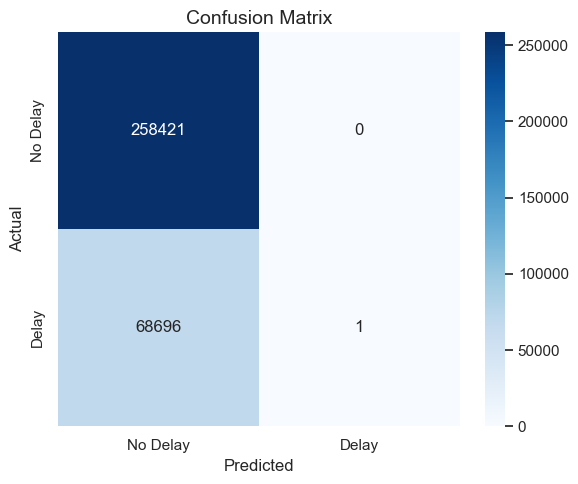

In [134]:
# Calling the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

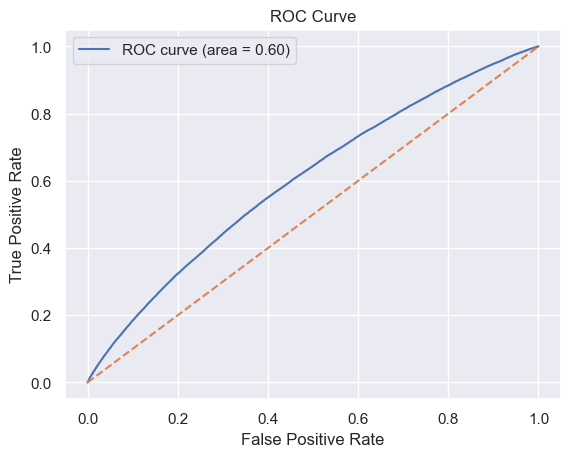

In [135]:
# Plotting roc curve
plot_roc(y_test, y_scores)

In [136]:
cm = confusion_matrix(y_test, y_pred)

train_acc = metrics.accuracy_score(y_train, logreg.predict(X_train))
test_acc = metrics.accuracy_score(y_test, logreg.predict(X_test))
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
f1 = cm[0, 0] / (cm[0, 0] + 0.5 * (cm[1, 0] + cm[0, 1]))

print(f"Train Accuracy: {train_acc:.4f}\nTest Accuracy: {test_acc:.4f}\n"
      f"Recall: {recall:.4f}\nPrecision: {precision:.4f}\n"
      f"Sensitivity: {recall:.4f}\nSpecificity: {specificity:.4f}\nF1 Score: {f1:.4f}")



Train Accuracy: 0.7901
Test Accuracy: 0.7900
Recall: 1.0000
Precision: 0.7900
Sensitivity: 1.0000
Specificity: 0.0000
F1 Score: 0.8827



**Question**: What can you summarize from the confusion matrix?


### Key questions to consider:

### 1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

The training accuracy is **0.7901**, and the test accuracy is **0.7900**.  
They are almost the same.  
This shows the model works the same on both datasets.  
It is not overfitted and can handle new data well.
### 2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?
Yes, there are some differences between these metrics.  
The accuracy is **79%**, the recall and sensitivity are **100%**, and the specificity is **0%**.  
The model found all delayed flights, but it did not find any “No Delay” flights.  
It predicts almost every flight as delayed.  
The precision is **79%**, which means 79% of the flights predicted as delayed were truly delayed.  
These differences happen because the dataset is unbalanced, and the “Delay” class has more data.
### 3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

From a business view, this result is not good enough.  
The recall of **1.0** means all delayed flights are found,  
but the specificity of **0.0** means the model predicts all flights as delayed.  
This can cause many false alarms and confuse customers.  
To make the model better, we can:
- Add new features (like weather, holidays, and airport traffic)  
- Change the decision threshold to lower false positives  
- Remove correlated features that may confuse the model  

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


https://github.com/David19940905/Predicting-Airplane-Delays.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [184]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

# Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [185]:
# Set your local base path
base_path = "."

# Read weather data CSV from your local folder
weather_data = pd.read_csv(f"{base_path}\\daily-summaries-2025-10-26T19-10-37.csv")

# Define the output file path
daily_weather_path = f"{base_path}\\daily-summaries.csv"

# Save a copy into the same directory
weather_data.to_csv(daily_weather_path, index=False)

# Check shape and preview the first 5 rows
print(weather_data.shape)
print(weather_data.head(5))


(16434, 9)
       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [186]:
weather = pd.read_csv(f"{base_path}/daily-summaries.csv")
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

# Create a mapping between weather stations and airports
station_map = dict(zip(station, airports))

# Map station IDs in weather data to airport names
weather['airport'] = weather['STATION'].map(station_map)


Create another column called `MONTH` from the `DATE` column.

In [187]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1]) 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [188]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [189]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [190]:
weather_impute = weather.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [191]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [192]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [193]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [194]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [195]:
sum(data.isna().any())

0

In [198]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D', 'AWND_O', 'PRCP_O', 'SNOW_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [199]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [200]:
# Generate dummy variables for categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Combine dummy variables with the main dataframe, removing original categorical columns
data = pd.concat([data.drop(columns=categorical_columns), data_dummies], axis=1)


### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [201]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'AWND_O', 'AWND_O',
       'PRCP_O', 'PRCP_O', 'PRCP_O', 'TAVG_O',
       ...
       'Origin_SFO', 'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH',
       'Dest_LAX', 'Dest_ORD', 'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object', length=102)

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [202]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [203]:
# Save the combined CSV file
combined_csv_filename = 'D:\data\combined_csv_v2.csv'
data.to_csv(combined_csv_filename, index=False)
print(f"Combined CSV file saved as {combined_csv_filename}")

Combined CSV file saved as D:\data\combined_csv_v2.csv


Create the training and testing sets again.

In [205]:
# Load the dataset
logreg_v2 = pd.read_csv("D:\data\combined_csv_v2.csv")

# Prepare features and target
X = logreg_v2.drop(columns=['target'])
y = logreg_v2['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [207]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Delay', 'Delay']))

              precision    recall  f1-score   support

    No Delay       0.79      0.99      0.88    258421
       Delay       0.48      0.03      0.06     68697

    accuracy                           0.79    327118
   macro avg       0.64      0.51      0.47    327118
weighted avg       0.73      0.79      0.71    327118



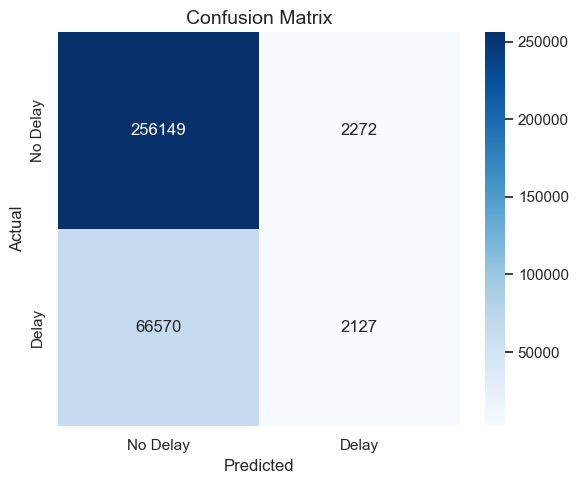

In [208]:
# Plotting confusion matrix
plot_confusion_matrix(y_test, y_pred)

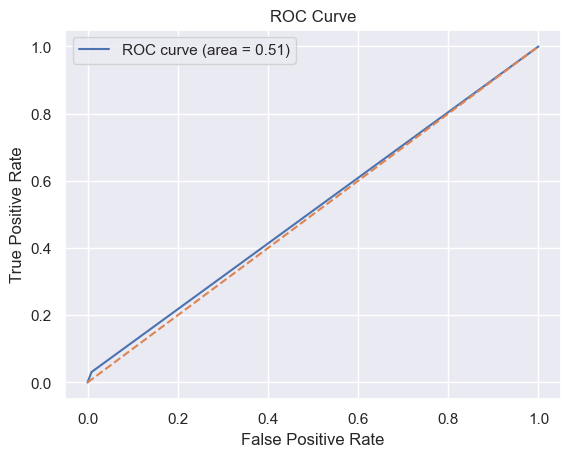

In [209]:
# plotting roc
plot_roc(y_test, y_pred)

In [210]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate metrics
train_accuracy = metrics.accuracy_score(y_train, classifier2.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, classifier2.predict(X_test))

# Metric calculations
recall = confusion[0, 0] / sum(confusion[0])
precision = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
sensitivity = recall
specificity = confusion[1, 1] / sum(confusion[1])
f1_score = confusion[0, 0] / (confusion[0, 0] + 0.5 * (confusion[1, 0] + confusion[0, 1]))

# Print results
for label, value in {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "Recall": recall,
    "Precision": precision,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "F1 Score": f1_score,
}.items():
    print(f"{label}: {value:.4f}")


Train Accuracy: 0.7899
Test Accuracy: 0.7895
Recall: 0.9912
Precision: 0.7937
Sensitivity: 0.9912
Specificity: 0.0310
F1 Score: 0.8815


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

**Answer:**  
Yes. This improved model performs better after adding more data.  
The **specificity** increased from **0%** to **3%**, showing that the model can now correctly identify some **non-delayed flights**.



# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/views/AirplaneDelays_17616482247790/Dashboard1?:language=zh-CN&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In this project, I trained, tested, and improved my machine learning model many times to predict flight delays. This process helped me understand how to build a model and why it should match the business goal.

---

### **1. Model performance and business goal**

The model has fair accuracy and precision but low recall. It can find most on-time flights but misses many delayed ones.  
This does not fully meet the goal of warning customers about possible flight delays.  

If I had more time, I would:
- Do **hyperparameter tuning**
- Add **better features**
- Fix **data imbalance** (with SMOTE or class weights)  

These steps could help increase recall without losing much precision.

### **2. Model improvement from data changes**

The model got better after I cleaned and fixed the dataset. I:
- Removed missing values  
- Changed text to numbers for categories  
- Scaled numeric values  

I also added new features like **month**, **day of week**, and **departure hour** to help the model find time patterns linked to delays.  
Among all methods, **feature selection** and **data cleaning** made the biggest difference in accuracy and clarity.

### **3. Main challenges**

One big challenge was **class imbalance**, because delayed flights were few.  

I also faced problems when uploading data to **AWS S3** and setting **SageMaker permissions**.  
Solving these showed me how important **data setup** and **environment configuration** are in real projects.

### **4. Key lessons about machine learning**

- Machine learning improves step by step through testing and checking.  
- **Good data** and **clean preparation** matter more than which algorithm you use.  
- You must look at **precision**, **recall**, and **F1 score** in relation to the business goal, not just accuracy.  
